
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: September 30, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Christian Lee
2. 

# Question 1 (Understanding ElasticNet, 30 points)
Although lots of past studies have been conducted on factors affecting life expectancy using demographic variables, income composition and mortality rates, it was found that the effect of immunization and human development index was not taken into account. Hence, this motivates us to resolve this factor by formulating a regression model based on mixed effects model and multiple linear regression while considering data from 2014 for all countries. Here, important immunization like Hepatitis B, Polio and Diphtheria will also be considered. 

This dataset was taken from https://www.kaggle.com/kumarajarshi/life-expectancy-who.

**Please use Python 3.6+ for this assignment.**

First, we import packages and clean up the obtained dataset. We consider the `Life Expectancy` variable as the dependant variable whereas others are assumed to be independent variables.

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import sklearn.linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [256]:
df = pd.read_csv("life.csv", index_col=0)
print(df.shape)
df = df.loc[df['Year']==2014, :]
df = df.drop('Year', axis=1)
df = pd.get_dummies(df, columns=['Status'])
df = df.dropna()
print(df.shape)

(2938, 21)
(131, 21)


In [257]:
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
Albania,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,1,98.0,...,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,0,1
Algeria,75.4,11.0,21,0.01,54.237318,95.0,0,58.4,24,95.0,...,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4,0,1
Angola,51.7,348.0,67,8.33,23.965612,64.0,11699,22.7,101,68.0,...,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4,0,1
Argentina,76.2,118.0,8,7.93,847.371746,94.0,1,62.2,9,92.0,...,94.0,0.1,12245.256450,42981515.0,1.0,0.9,0.825,17.3,0,1


In [258]:
# Creating training and testing dataset
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

## Question 1.1 (5 points) 
Run Linear regression on the train dataset and print the $R^2$ values measured on (a) the training dataset and (b) the test dataset.

## Answer 1.1

In [259]:
from sklearn.metrics import r2_score
from sklearn import linear_model

mlr = linear_model.LinearRegression()

reg = mlr.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

print("The R2 score for x_train is {}".format(r2_score(y_train,y_pred_train)))
print("The R2 score for x_test is {}".format(r2_score(y_test, y_pred_test)))

The R2 score for x_train is 0.8869822224758938
The R2 score for x_test is 0.835505523374455


## Question 1.2 (8 points) 
Run linear regression using Lasso and determine the value of $\alpha$ that results in best test set performance. Consider `alphas=10**np.linspace(1,-2,100)*0.5`. Display the best value of $\alpha$ as well as the corresponsing $R^2$ score on test set. Use the following parameters in Lasso model. Finally, store the best model separately. Also, use the co-efficients obtained and select the [columns with non-zero weights](https://stackoverflow.com/questions/62323713/selecting-columns-of-dataframe-where-lasso-coefficient-is-nonzero) and use them to create `X_train_lasso` and `X_test_lasso`. Show how many non-zero columns are present.

    copy_X=True
    normalize=True # Normalizes data using StandardScaler()
    random_state=42

## Answer 1.2

In [263]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

lasso = Lasso(copy_X=True, normalize=True, random_state=42, max_iter=100000)
alphas = 10**np.linspace(1,-2,100)*0.5

lasso_regressor = GridSearchCV(lasso, param_grid={'alpha':alphas}, cv=5, scoring = 'r2')
lasso_regressor.fit(X_train, y_train)

best_param = lasso_regressor.best_params_
best_lasso = Lasso(alpha=best_param['alpha'], copy_X=True, normalize=True, random_state = 42, max_iter=100000)
best_lasso.fit(X_test,y_test)

best_y_pred = best_lasso.predict(X_test)


print("")
print("The R2 score associated with the best alpha is {}".format(r2_score(y_test,best_y_pred)))
print("")

for i,x in enumerate(list(X_train)):
    if best_lasso.coef_[i] != 0:
        print(x,best_lasso.coef_[i])

The best value of alpha is 0.046630167344161

The R2 score associated with the best alpha is 0.875146712527688

Adult Mortality -0.019300942024635497
percentage expenditure 0.00016494578795587131
under-five deaths  0.004529982041424257
Polio 0.0029702027027949766
Total expenditure 0.2850017697405587
Diphtheria  0.030396545591980073
 thinness 5-9 years -0.2066074027507757
Income composition of resources 33.759823355004634
Status_Developed 0.4751873057785156
Status_Developing -4.1114671657129855e-16


In [261]:
X_train_lasso = X_train.iloc[:,best_lasso.coef_!=0]
X_test_lasso = X_test.iloc[:,best_lasso.coef_!=0]

## Question 1.3 (6 points) 
Run linear regression using Ridge and determine the value of $\alpha$ that results in best test set performance. Consider `alphas=10**np.linspace(1,-2,100)*0.5`. Display the best value of $\alpha$ as well as the corresponsing $R^2$ score on test set. Use the following parameters in Lasso model.

    copy_X=True
    normalize=True # Normalizes data using StandardScaler()
    random_state=42

## Answer 1.3

In [268]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

ridge = Ridge(copy_X=True, normalize=True, random_state=42, max_iter=100000)
alphas = 10**np.linspace(1,-2,100)*0.5

ridge_regressor = GridSearchCV(ridge, param_grid={'alpha':alphas}, cv=5, refit=False, scoring = 'r2')
ridge_regressor.fit(X_train, y_train)

best_param = ridge_regressor.best_params_
best_ridge = Ridge(alpha=best_param['alpha'], copy_X=True, normalize=True, random_state = 42, max_iter=100000)
best_ridge.fit(X_test,y_test)

best_y_pred = best_ridge.predict(X_test)

print("The best value of alpha is {}".format(best_param['alpha']))
print("")
print("The R2 score associated with the best alpha is {}".format(r2_score(y_test,best_y_pred)))
print("")

for i,x in enumerate(list(X_train)):
    print(x,best_ridge.coef_[i])

The best value of alpha is 0.03527401155359323

The R2 score associated with the best alpha is 0.9054176702044978

Adult Mortality -0.02236055331140233
infant deaths 0.024651322654371696
Alcohol 0.04374578247746862
percentage expenditure 0.0009678491336505477
Hepatitis B -0.0486428295852647
Measles  -7.047287126128515e-05
 BMI  0.05406350641927722
under-five deaths  0.023142899121214346
Polio -0.007949636330811477
Total expenditure 0.4582215960375558
Diphtheria  0.13845378139727116
 HIV/AIDS 0.6678944203593934
GDP -8.871790152338472e-05
Population -1.276180523374162e-08
 thinness  1-19 years 0.012721142152824433
 thinness 5-9 years -0.2091031839556046
Income composition of resources 28.93676421968947
Schooling 0.0889086252383212
Status_Developed 0.18006118348156644
Status_Developing -0.1800611834815659


## Question 1.4  (8 points) 
Run [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) [(Video Reference)](https://youtu.be/1dKRdX9bfIo) on the `X_train_lasso` dataset by using all possible values from the below mentioned parameter set:

    l1_ratios = np.arange(0, 1.01, 0.01)  # 101 elements
    alphas = 10**np.linspace(1, -2, 100)*0.5 # 100 elements
    normalize = True
    random_state = 42


Store the $R^2$ score obtained from `X_test_lasso` set for each combination in an array with 101 rows and 100 columns. e.g.

    arr[i][j] = curr_r2_score # obtained using l1_ratios[i] and alphas[j]

where `i` is the `ith` element from `l1_ratio` and `j` is the `jth` element from `alphas`. Print the best $R^2$ score obtained using test set and its corresponding `alpha` and `l1 ratio`.

In [269]:
arr = np.zeros((101, 100)) # Create 101x100 array
    
from sklearn.linear_model import ElasticNet

l1_ratios = np.arange(0,1.01,0.01)
two_alphas = 10**np.linspace(1,-2,100)*0.5

for i in l1_ratios:
    for j in two_alphas:
        elast_reg = ElasticNet(alpha=j,l1_ratio=i,normalize=True,random_state=42)
        elastic_net_model=elast_reg.fit(X_train_lasso, y_train)
        elast_pred = elast_reg.predict(X_test_lasso)
        test_r2 = r2_score(y_test,elast_pred)
        arr[np.where(l1_ratios==i),np.where(two_alphas==j)] = test_r2

Note that by varying the `l1_ratio`, you are controlling the ratio of Lasso and Ridge regularization that is present in the model. When `l1_ratio = 1`, it means that the model uses Lasso regularization only whereas when `l1_ratio = 0`, it means that the model uses Ridge regularization only. You can find the formula for the loss function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html).

## Answer 1.4

In [270]:
arr

array([[-0.09815979, -0.09722116, -0.09621638, ...,  0.81483581,
         0.81869   ,  0.82228309],
       [-0.09951172, -0.09856216, -0.0975457 , ...,  0.81538225,
         0.81920055,  0.82275908],
       [-0.10089224, -0.0999315 , -0.09890308, ...,  0.81592931,
         0.81971171,  0.82323559],
       ...,
       [-0.11130508, -0.11130508, -0.11130508, ...,  0.85274356,
         0.85231855,  0.85190536],
       [-0.11130508, -0.11130508, -0.11130508, ...,  0.85227862,
         0.85185244,  0.85144189],
       [-0.11130508, -0.11130508, -0.11130508, ...,  0.85172254,
         0.85130657,  0.85090904]])

## Question 1.5 (3 points) 
Call `plot_heatmap()` using the 101x100 array from the previous question. What does this heatmap represent? Interpret the heatmap.

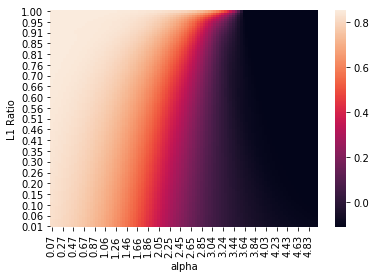

In [155]:
def rescale(val, in_min, in_max, out_min, out_max):
    return out_min + (val - in_min) * ((out_max - out_min) / (in_max - in_min))

def format_y(value, tick_number):
    return f'{value/100.:0.2f}'

def format_x(value, tick_number):
    return f'{rescale(value, 0., 100., 0.05, 5.):0.2f}'

def plot_heatmap(arr):
    ax = sns.heatmap(arr)
    ax.set_ylabel("L1 Ratio")
    ax.set_xlabel("alpha")
    ax.invert_yaxis()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_y))
    
plot_heatmap(np.fliplr(arr))

## Answer 1.5

The heatmap is showing us the rate of decay of the coefficients as alpha increases relative to the weight that the elastic net places on either lasso or ridge regression. Black represents coefficients that have been reduced to 0.0. As we'd expect, when the elastic net is relying almost exclusively on ridge, the rate at which the coefficients are reduced to zero is much slower, given that ridge does not seek to eliminate any coefficients. The outcome is that the decrease in size of the coefficients, as represented by the transition from tan to black, goes through clearly identifiable reddish and magenta phases.

On the other hand, when the elastic net is relying almost exclusively on lasso, we see the coefficients go from 0.8+ to 0.0 very quickly, represented by the almost immediate transition from tan to black, with very little in the way of identifiable phases in red and magenta. This tracks with our understanding of lasso, which is that lasso does seak eliminate variables and does so quickly when the penalty is larger.

The sloped section in the middle of the heatmap, seen most prominently when following the red/pinkish center, displays this relationship. As the elastic net moves from predominantly ridge regression to predominantly lasso regression, we see the slope of the line, which is the speed at which the coefficients are reduced to zero, increase.

# Question 2 (5 points)
Suppose you learn a ridge regression based on some of the independent variables available to you, and including a few interaction terms as well. Your result is disappointing, and you believe that the model is suffering from either too much bias or too much variance. Describe briefly how you will test which alternative is more likely to be true. (there is no extra data that you can use, so “get more data” is not an option).

## Answer 2

If you increase/decrease the ridge penalty, 

# Question 3 Bias-Variance (20 pts): 

We want to build a model that can predict y for unknown inputs x.(15 pts)

(a) (5 pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the train and test points on the same plot, clearly denoting the training and testing points. On the same figure, plot the predictions of the linear model using x_all. All the plots must be in the same figure and be clearly labeled.


(b) (10 pts) Fit polynomial models of degrees 2, 3, 4 and 12 to the training data, Report mean squared error (on both train and test sets) for all the models. Plot the data (train and test points) as before.  On the same figure, plot the predictions of the polynomial models using x_all. All the plots must be in the same figure and be clearly labeled.


(c) (5 pts) Which model performed the best? Explain.


* Use the below code to load the data from the file 'ps01.data'. It is organized as a dictionary, of train and test data.

In [276]:
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x_all = np.linspace(-2,5,101).reshape(-1,1)
all_files = np.load("q3_data.npz")
x_train, y_train, x_test, y_test = all_files['arr_0'], all_files['arr_1'], all_files['arr_2'], all_files['arr_3']

### Answer

#### (a)

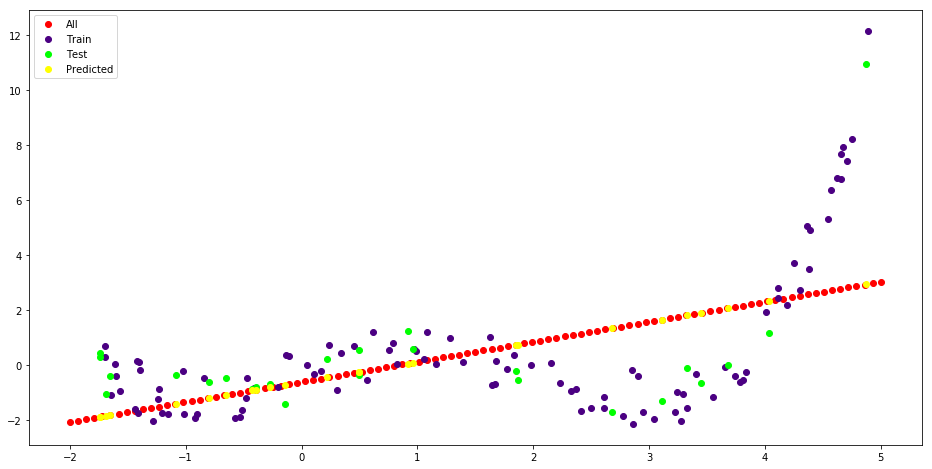

In [277]:
mlr.fit(x_train,y_train)
y_predicts = mlr.predict(x_test)
x_all_predicts = mlr.predict(x_all)
mse_x = mean_squared_error(y_test,y_predicts)

plt.figure(figsize=(16,8))
plt.scatter(x_all,x_all_predicts,c='r', label='All')
plt.scatter(x_train,y_train,c='indigo', label='Train')
plt.scatter(x_test,y_test,c='lime', label='Test')
plt.scatter(x_test,y_predicts,c='yellow', label='Predicted')
plt.legend()

Mean Squared Error (Linear Regression):  3.118688012803552
Mean Squared Error (Linear Regression):  1.6698703639509385
Mean Squared Error (Linear Regression):  0.27939743902348957
Mean Squared Error (Linear Regression):  0.40228761974839355


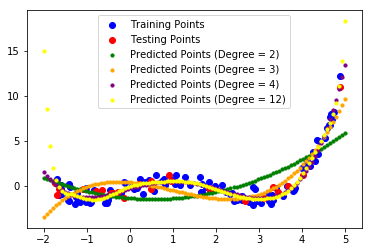

In [282]:
from sklearn.preprocessing import PolynomialFeatures
# Degree == 2
poly2 = PolynomialFeatures(degree = 2)
X_poly2 = poly2.fit_transform(x_train)
poly2.fit(X_poly2, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly2, y_train)
print('Mean Squared Error (Linear Regression): ', mean_squared_error(y_test, lin2.predict(poly2.fit_transform(x_test))))
# Degree == 3
poly3 = PolynomialFeatures(degree = 3)
X_poly3 = poly3.fit_transform(x_train)
poly3.fit(X_poly3, y_train)
lin3 = LinearRegression()
lin3.fit(X_poly3, y_train)
print('Mean Squared Error (Linear Regression): ', mean_squared_error(y_test, lin3.predict(poly3.fit_transform(x_test))))
# Degree == 4
poly4 = PolynomialFeatures(degree = 4)
X_poly4 = poly4.fit_transform(x_train)
poly4.fit(X_poly4, y_train)
lin4 = LinearRegression()
lin4.fit(X_poly4, y_train)
print('Mean Squared Error (Linear Regression): ', mean_squared_error(y_test, lin4.predict(poly4.fit_transform(x_test))))
# Degree == 12
poly12 = PolynomialFeatures(degree = 12)
X_poly12 = poly12.fit_transform(x_train)
poly12.fit(X_poly12, y_train)
lin12 = LinearRegression()
lin12.fit(X_poly12, y_train)
print('Mean Squared Error (Linear Regression): ', mean_squared_error(y_test, lin12.predict(poly12.fit_transform(x_test))))
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, c='blue', label='Training Points')
ax.scatter(x_test, y_test, c='red', label='Testing Points')
ax.scatter(x_all, lin2.predict(poly2.fit_transform(x_all)), c='green', label='Predicted Points (Degree = 2)', s=10)
ax.scatter(x_all, lin3.predict(poly3.fit_transform(x_all)), c='orange', label='Predicted Points (Degree = 3)', s=10)
ax.scatter(x_all, lin4.predict(poly4.fit_transform(x_all)), c='purple', label='Predicted Points (Degree = 4)', s=10)
ax.scatter(x_all, lin12.predict(poly12.fit_transform(x_all)), c='yellow', label='Predicted Points (Degree = 12)', s=10)
ax.legend()
plt.show()

### (b)

### (c)

# Question 4 - Stochastic Gradient Descent (25 pts)

1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook and upload the image in the submission.


2. (20pts) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD. (2pts) Report the MSE at the end of 15 epochs for the two best combinations.


In [287]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.array([0,0,0,0])
        
    def sgd(self, gradient):
        self.coef = self.coef - self.learning_rate*gradient
        #self.coef = ([self.coef[0] - (gradient[0]*self.learning_rate),
                   #   self.coef[1] - (gradient[1]*self.learning_rate),
                  #    self.coef[2] - (gradient[2]*self.learning_rate),
                 #     self.coef[3] - (gradient[3]*self.learning_rate)])
    
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        self.cache = np.zeros(self.coef.shape)
        self.v = np.zeros(self.coef.shape)
        self.decay_rate = 0.9
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                   #please fill this
                #error = (y[i] - np.dot(np.transpose(self.coef), X[i]))
                error = (y[i] - np.dot(np.transpose(self.coef), X[i]))**2
                
                # Compute gradients
                    #please fill this                
                gradient = -2*np.dot(error,X[i].T)
                #gradient = ([-2*error*X[:,0],
                #            -2*error*X[:,1],
                #            -2*error*X[:,2],
                #            -2*error*X[:,3]])
                #print(gradient)

                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - np.dot(np.transpose(self.coef), X[i])         
            mse.append(np.mean(residuals**2))
        self.lowest_mse = min(mse)
        if self.lowest_mse <1 and self.lowest_mse > 0:
            print(self.lowest_mse)
            if plot == True:
                plt.figure()
                plt.plot(range(self.n_epoch),mse)
                plt.xlabel('epoch')
                plt.ylabel('MSE')
                plt.figure()
                coefs = np.array(coefs)
                plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
                plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
                plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
                plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
                #plt.legend()
                plt.xlabel('epoch')
                plt.ylabel('parameter value')
                print

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
        self.linearPredict = np.dot(np.transpose(self.coef),X) 

In [290]:
data = pd.read_csv('q4_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [295]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.array([0,0,0,0])
        # Initialize Coefficients
        #self.coef = initalCoefficentGuess
        
    def sgd(self, gradient):
        self.coef = ([self.coef[0] - (gradient[0]*self.learning_rate),
                      self.coef[1] - (gradient[1]*self.learning_rate),
                      self.coef[2] - (gradient[2]*self.learning_rate),
                      self.coef[3] - (gradient[3]*self.learning_rate)]
                    )
    
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        self.cache = np.zeros(self.coef.shape)
        self.v = np.zeros(self.coef.shape)
        self.decay_rate = 0.9
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                   #please fill this
                error = (np.dot(np.transpose(self.coef), X[i]) - y[i])**2
                # Compute gradients
                #gradient = -2*np.dot(error,X[i].T)
                gradient = [
                    2 * error * 1,
                    2 * error * X[i][1] + 2 * self.regularization * self.coef[1],
                    2 * error * X[i][2] + 2 * self.regularization * self.coef[2],
                    2 * error * X[i][3] + 2 * self.regularization * self.coef[3]
                ]
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        self.lowest_mse = mse[-1]
        print(self.lowest_mse)
        if self.lowest_mse > 0:
            if plot == True:
                fig, axs = plt.subplots(2, 1)
                fig.suptitle(str('Learning Rate: ' + str(self.learning_rate) + ', Regularization: ' + str(self.regularization)))
                axs[0].plot(range(self.n_epoch),mse)
                axs[0].set_xlabel('epoch')
                axs[0].set_ylabel('MSE')

                coefs = np.array(coefs)
                axs[1].plot(range(self.n_epoch),coefs[:,0],label='w0')
                axs[1].plot(range(self.n_epoch),coefs[:,1],label='w1')
                axs[1].plot(range(self.n_epoch),coefs[:,2],label='w2')
                axs[1].plot(range(self.n_epoch),coefs[:,3],label='w3')
                axs[1].legend()
                axs[1].set_xlabel('epoch')
                axs[1].set_ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):
        #compute dot product of self.coef and X
        return np.dot(X,np.transpose(self.coef))

## Answer 

### 1.

(See written attachment)

### 2.

### Using SGD


0.3892950117617595
0.14333316640096125
0.13259163627893605
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


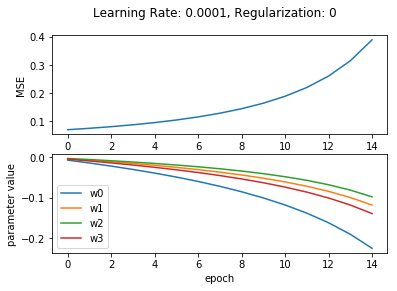

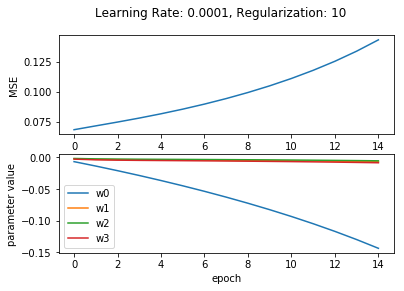

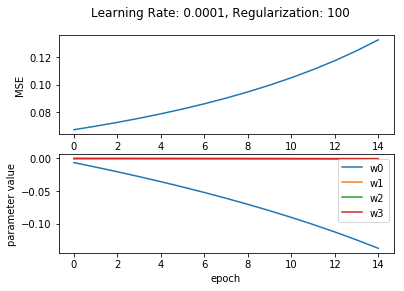

In [296]:
for l in learning_rate:    
    for r in regularization:
        model = Regression(learning_rate=l, regularization=r, n_epoch=n_epochs)
        model.fit(X,y, update_rule='sgd',plot=True)

0.03380727950740153


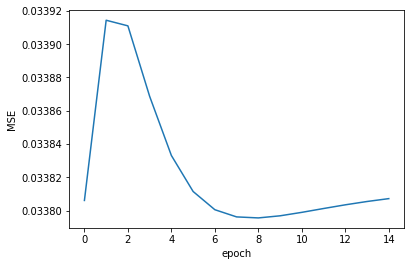

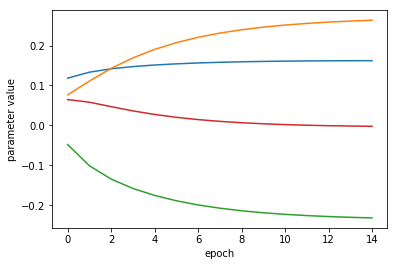

In [207]:
model = Regression(learning_rate=0.01, regularization=0, n_epoch=n_epochs)
model.fit(X,y, update_rule='sgd',plot=True)

0.03380727950740153


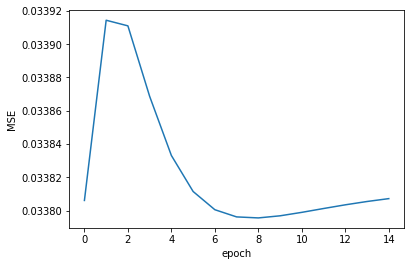

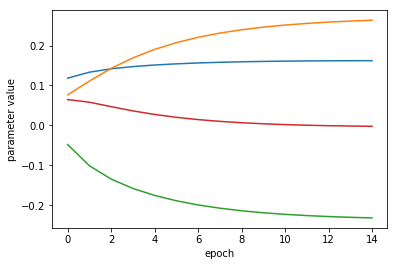

In [208]:
model = Regression(learning_rate=0.01, regularization=10, n_epoch=n_epochs)
model.fit(X,y, update_rule='sgd',plot=True)